In [14]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

# Mapping of text keys to DataFrame column names
mapping = {
    'sim_time:': 'sim_time',
    'created:': 'created',
    'started:': 'started',
    'relayed:': 'relayed',
    'aborted:': 'aborted',
    'dropped:': 'dropped',
    'removed:': 'removed',
    'delivered:': 'delivered',
    'delivery_prob:': 'delivery_prob',
    'response_prob:': 'response_prob',
    'overhead_ratio:': 'overhead_ratio',
    'latency_avg:': 'latency_avg',
    'latency_med:': 'latency_med',
    'hopcount_avg:': 'hopcount_avg',
    'hopcount_med:': 'hopcount_med',
    'buffertime_avg:': 'buffertime_avg',
    'buffertime_med:': 'buffertime_med'
}
#records = []
# folder_path = "/content/drive/MyDrive/Colab Notebooks/a/"
# for filename in os.listdir(folder_path):
#     if (filename.endswith(".txt") and os.path.getsize(os.path.join(folder_path, filename)) > 0):
#         record = {}
#         with open(os.path.join(folder_path, filename)) as file:
#             for line in file:
#                 if 'Message' in line:
#                     parts = line.split()
#                     router_name = parts[4].split("_")[0]
#                     record['router'] = 0 if router_name == 'EpidemicRouter' else (1 if router_name == 'ProphetRouter' else 2)
#                     record['host'] = float(parts[4].split("_")[-1].replace("hostNo", ""))
#                 else:
#                     for key, col in mapping.items():
#                         if key in line:
#                             record[col] = float(line.split()[1])
#                             break
#         records.append(record)
# df = pd.DataFrame(records)
# df.fillna(0, inplace=True)
# csv_path = "/content/drive/MyDrive/Colab Notebooks/message_stats.csv"
# df.to_csv(csv_path, index=False)
# print(f"CSV file saved at: {csv_path}")

In [15]:
df = pd.read_csv("message_stats.csv")
df = df.drop(['created', 'delivered'], axis=1)
# Create subsets for each router type
df0 = df[df['router'] == 0]  # EpidemicRouter
df1 = df[df['router'] == 1]  # ProphetRouter
df2 = df[df['router'] == 2]  # SprayAndWaitRouter
df

,router,host,sim_time,started,relayed,aborted,dropped,removed,delivery_prob,response_prob,overhead_ratio,latency_avg,latency_med,hopcount_avg,hopcount_med,buffertime_avg,buffertime_med
0,2,175.0,273600.0,127264.0,54200.0,73061.0,52785.0,0.0,0.8679,0.0,5.7371,4689.1541,3679.6,2.5587,3.0,12688.4319,13030.4
1,2,199.0,360000.1,172676.0,71578.0,101097.0,70241.0,0.0,0.8840,0.0,5.6380,4873.6703,3837.4,2.5810,3.0,13559.6662,14694.3
2,2,177.0,280800.0,133009.0,55629.0,77380.0,54292.0,0.0,0.8636,0.0,5.7716,4836.9188,3783.8,2.5654,3.0,12816.2401,13206.5
3,2,178.0,284400.0,134814.0,56355.0,78458.0,55040.0,0.0,0.8661,0.0,5.7523,4764.2750,3685.0,2.5678,3.0,12817.9483,13259.2
4,2,179.0,288000.0,136445.0,57050.0,79395.0,55764.0,0.0,0.8672,0.0,5.7419,4846.9801,3779.8,2.5593,3.0,12828.4925,13256.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405,0,27.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0
6406,0,27.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0
6407,0,27.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0
6408,0,27.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0


In [16]:
grouped_stats = df.groupby("router").agg({
    "delivery_prob": ["mean", "std", "max", "min"],
    "overhead_ratio": ["mean", "std", "max", "min"],
    "latency_avg": ["mean", "std", "max", "min"],
    # Add more columns as needed
})
grouped_stats

delivery_prob                        overhead_ratio               \
                mean       std     max  min           mean          std   
router                                                                    
0           0.111619  0.091347  0.3083  0.0    2067.337157  3402.707354   
1           0.063922  0.110636  0.3583  0.0     227.726819   581.099371   
2           0.421633  0.364661  0.8994  0.0       4.596644     4.421422   

                         latency_avg                               
               max  min         mean          std        max  min  
router                                                             
0       19040.5191  0.0  2175.253691  1872.474578  5036.4000  0.0  
1        4079.2941  0.0   742.759864  1393.307321  5264.2154  0.0  
2          30.6316  0.0  2346.333964  2031.450186  5019.0752  0.0

In [17]:
df.describe()  # Numeric summary for all routers combined

,router,host,sim_time,started,relayed,aborted,dropped,removed,delivery_prob,response_prob,overhead_ratio,latency_avg,latency_med,hopcount_avg,hopcount_med,buffertime_avg,buffertime_med
count,6410.000000,6410.000000,6410.000000,6.410000e+03,6.410000e+03,6.410000e+03,6.410000e+03,6410.0,6410.000000,6410.0,6410.000000,6410.000000,6410.000000,6410.000000,6410.000000,6410.000000,6410.000000
mean,1.000468,109.755538,37118.641108,4.861346e+05,2.728645e+05,2.132529e+05,2.716671e+05,0.0,0.225114,0.0,869.675197,1949.411918,1476.700094,3.267671,2.878627,2538.193292,2555.617473
std,0.891614,121.536658,59840.584627,1.278653e+06,7.275618e+05,5.523848e+05,7.269884e+05,0.0,0.290687,0.0,2370.446479,1952.598387,1478.100172,4.253942,3.552991,4649.540200,4951.291748
min,0.000000,8.000000,58.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,58.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,50.000000,7200.000000,7.822500e+03,3.230500e+03,4.529000e+03,7.105000e+02,0.0,0.145200,0.0,5.926250,1740.828700,1385.550000,2.490300,2.000000,181.324250,122.850000
75%,2.000000,160.000000,50400.100000,1.378490e+05,6.897800e+04,7.082025e+04,6.723900e+04,0.0,0.260300,0.0,400.944875,3967.403300,2983.000000,5.159000,5.000000,1141.755000,750.200000
max,2.000000,500.000000,363600.100000,1.737587e+07,1.010826e+07,7.267401e+06,1.010175e+07,0.0,0.899400,0.0,19040.519100,5264.215400,4046.400000,18.540400,16.000000,16620.163400,17898.100000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


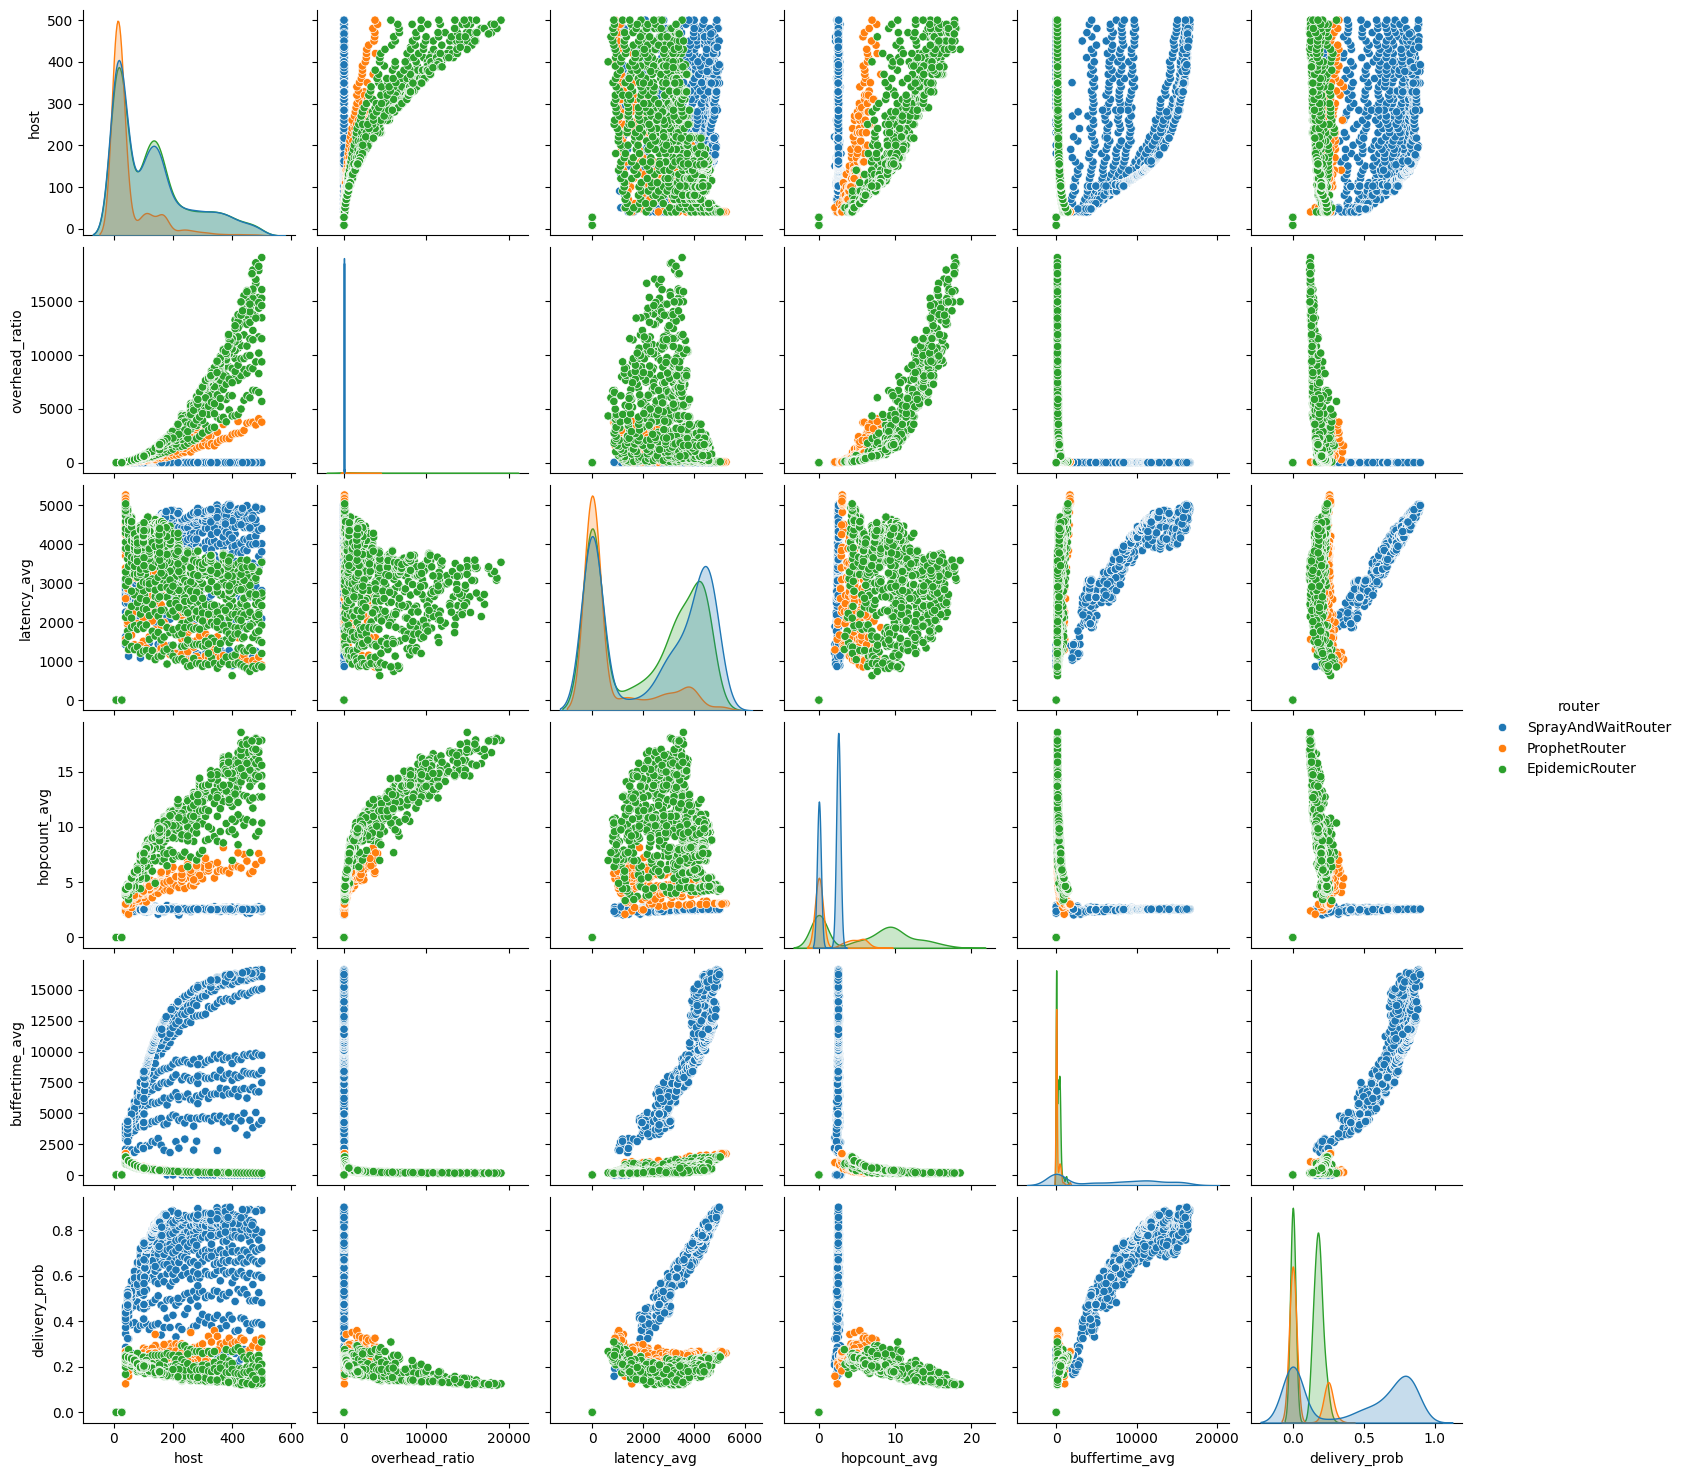

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping router numbers to names
router_mapping = {0: "EpidemicRouter", 1: "ProphetRouter", 2: "SprayAndWaitRouter"}
df["router"] = df["router"].replace(router_mapping)

# Pairplot
sns.pairplot(df, hue="router", vars=["host", "overhead_ratio", "latency_avg", "hopcount_avg", "buffertime_avg","delivery_prob"])
plt.savefig("Pairplot.eps", format="eps", dpi=300, bbox_inches="tight")
plt.savefig("Pairplot.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()


In [19]:
reversed_mapping = {v: k for k, v in router_mapping.items()}
df["router"] = df["router"].replace(reversed_mapping)
def dataset(df):
    # Define Features (X) and Target (y)
    X = df.drop(columns=['delivery_prob'])  # Features (All columns except the target)
    y = df['delivery_prob']  # Target Variable

    # Split data into Training and Testing sets (80% Train, 20% Test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return [X_train, X_test, y_train, y_test, X, y]
datasetA = dataset(df)
dataset0 = dataset(df0)
dataset1 = dataset(df1)
dataset2 = dataset(df2)

C:\Users\User\AppData\Local\Temp\ipykernel_6996\3515500917.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["router"] = df["router"].replace(reversed_mapping)


Correlation Heatmap

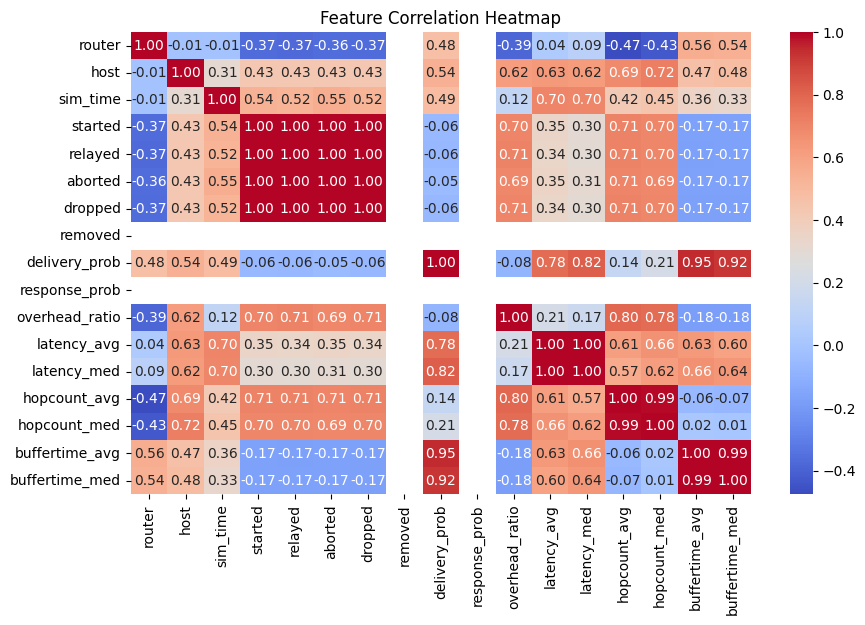

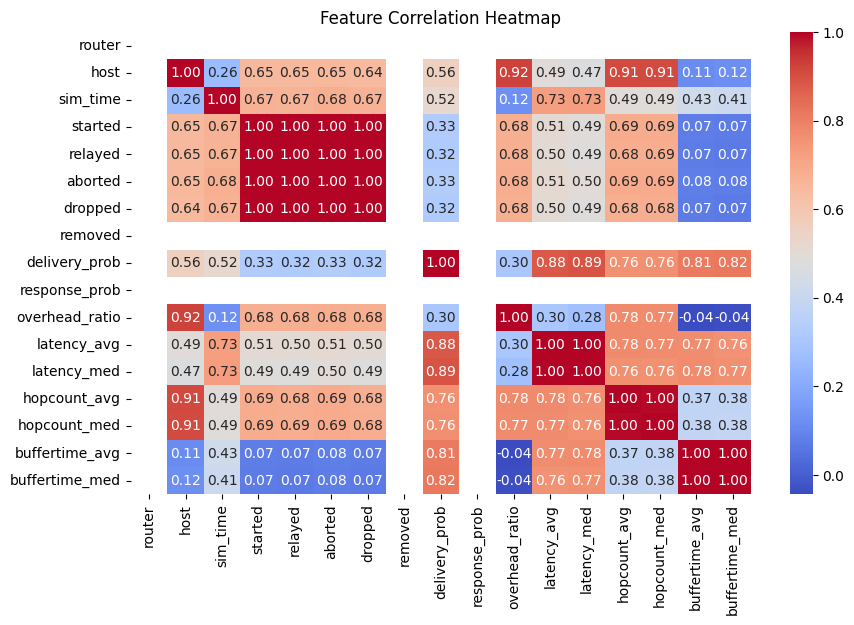

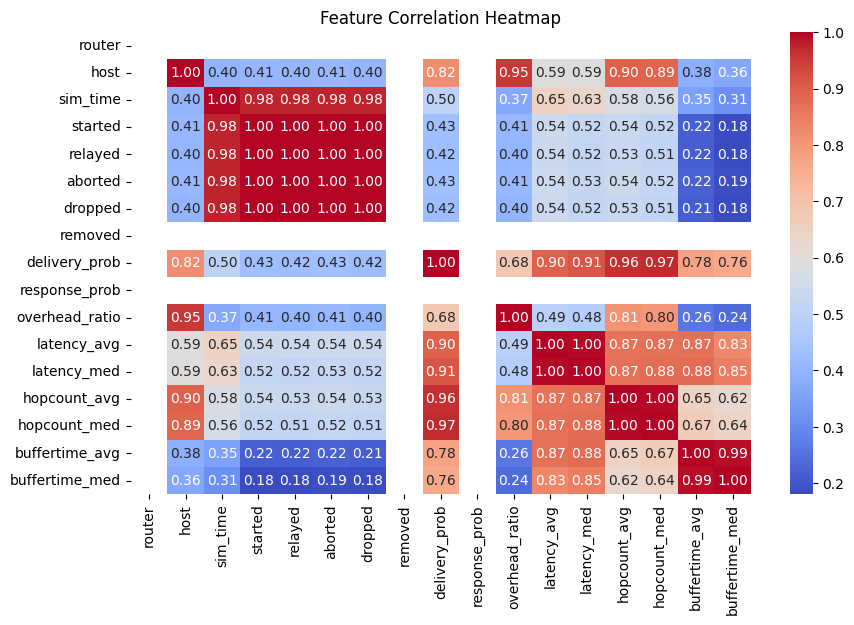

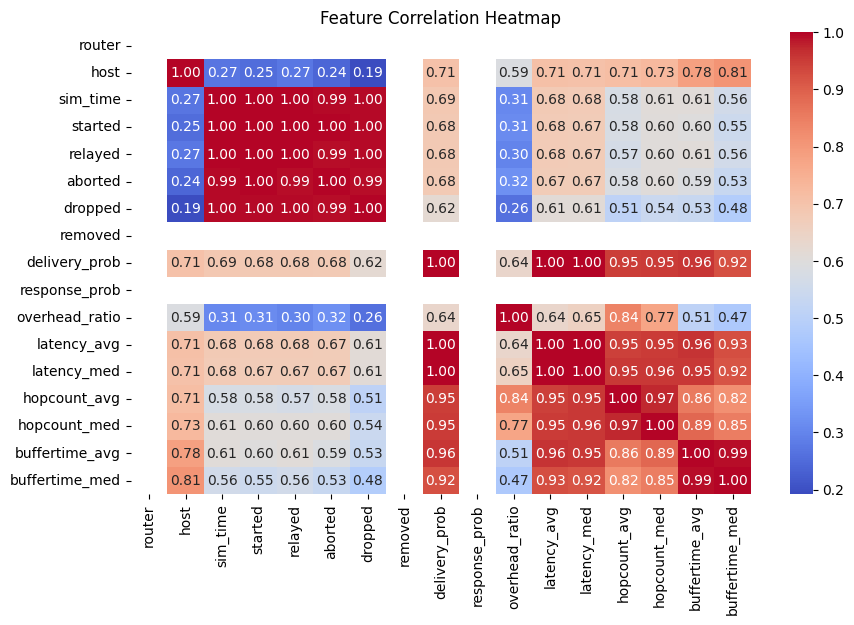

In [20]:

def chmap(df,name):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Feature Correlation Heatmap")
    plt.savefig(f'plot-{name}-heatmap.jpg', format="jpg", dpi=300, bbox_inches="tight")
    plt.savefig(f'plot-{name}-heatmap.eps', format="eps", dpi=300, bbox_inches="tight")
    plt.show()
    
chmapA = chmap(df,'all')
chmap0 = chmap(df0,'Epidemic') #ER
chmap1 = chmap(df1,'Prophet') #PR
chmap2 = chmap(df2,'Spray') #SR

Linear Regression <br>
Random Forest Regressor <br>
XGBoost Regressor <br>
Support Vector Regressor (SVR)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
def ml(dataset):
    lr = LinearRegression()
    lr.fit(dataset[0], dataset[2])
    y_pred_lr = lr.predict(dataset[1])

    rf = RandomForestRegressor(n_estimators=500, random_state=42)
    rf.fit(dataset[0], dataset[2])
    y_pred_rf = rf.predict(dataset[1])

    xgb = XGBRegressor(n_estimators=500, learning_rate=0.01, random_state=42 )
    xgb.fit(dataset[0], dataset[2])
    y_pred_xgb = xgb.predict(dataset[1])

    svr = SVR(kernel='rbf')
    svr.fit(dataset[0], dataset[2])
    y_pred_svr = svr.predict(dataset[1])
    return [y_pred_lr,y_pred_rf,y_pred_xgb,y_pred_svr,lr,rf,xgb,svr]
mlA = ml(datasetA)
ml0 = ml(dataset0)
ml1 = ml(dataset1)
ml2 = ml(dataset2)

Model Evaluation (Metrics)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def result(dataset,ml):
    # Store results
    results = []

    # Number of samples (n) and features (k) - assuming X_train shape
    n = len(dataset[3])
    k = dataset[0].shape[1]  # Change this if needed

    models = {
        'Linear Regression': ml[0],
        'Random Forest': ml[1],
        'XGBoost': ml[2],
        'SVR': ml[3]
    }

    for name, y_pred in models.items():
        mae = mean_absolute_error(dataset[3], y_pred)
        mse = mean_squared_error(dataset[3], y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(dataset[3], y_pred)

        results.append((name, mae, mse, rmse, r2))

    # Sort by R² Score
    results.sort(key=lambda x: x[4], reverse=True)

    # Print results
    print(f"{'Model':<20} {'MAE':<10} {'MSE':<12} {'RMSE':<12} {'R² Score':<10}")
    print("=" * 80)

    for name, mae, mse, rmse, r2 in results:
        print(f"{name:<20} {mae:<10.4f} {mse:<12.4f} {rmse:<12.4f} {r2:<10.4f}")
resultA = result(datasetA,mlA)


Model                MAE        MSE          RMSE         R² Score  
Random Forest        0.0015     0.0000       0.0048       0.9997    
XGBoost              0.0033     0.0000       0.0056       0.9996    
Linear Regression    0.0217     0.0011       0.0333       0.9873    
SVR                  0.1267     0.0261       0.1615       0.7019    


Scatter Plot (Actual vs. Predicted)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


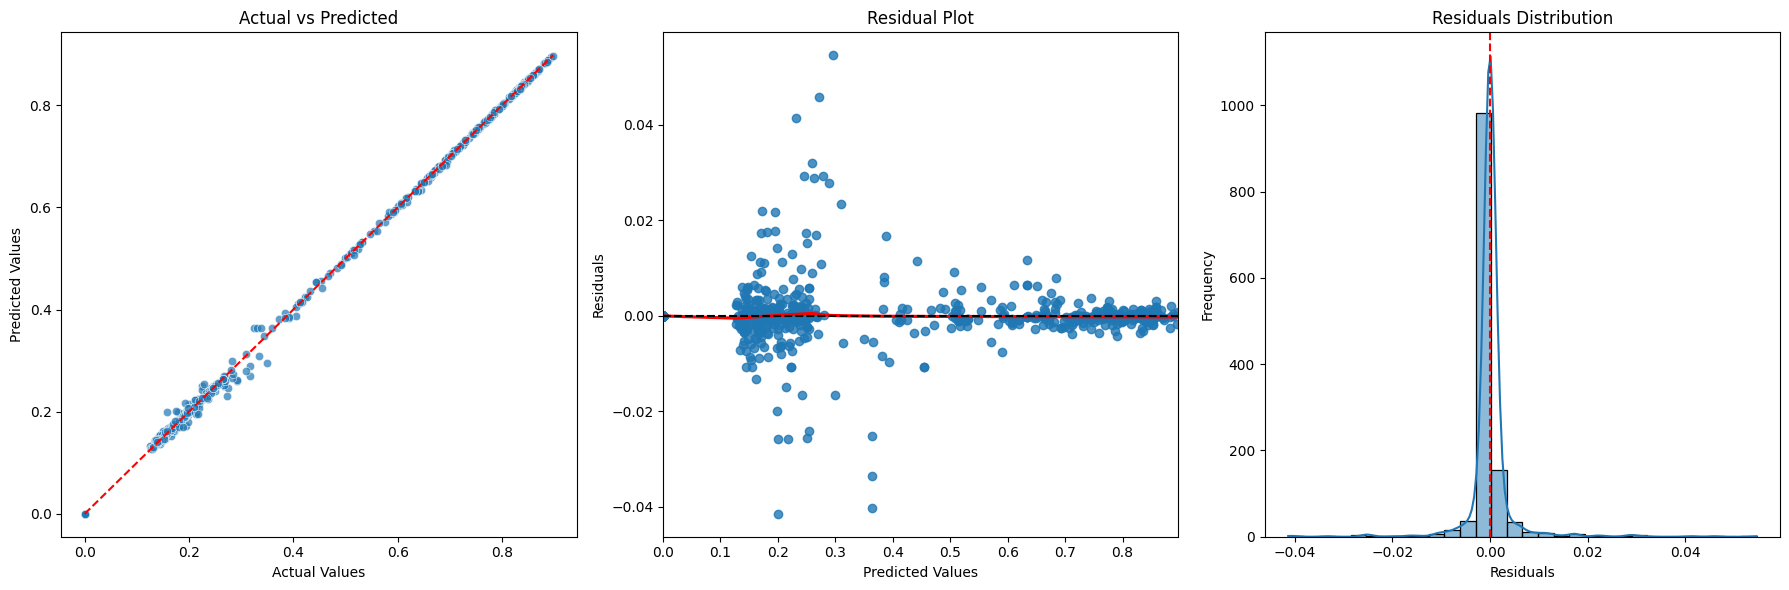

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

#dataset return [X_train, X_test, y_train, y_test, X, y]
# ml return [y_pred_lr,y_pred_rf,y_pred_xgb,y_pred_svr,lr,rf,xgb,svr]

def sp(dataset,ml):
    # Calculate residuals
    residuals = dataset[3] - ml[1]

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # 1️⃣ Scatter Plot (Actual vs. Predicted)
    sns.scatterplot(x=dataset[3], y=ml[1], alpha=0.7, ax=axes[0])
    axes[0].plot([dataset[3].min(), dataset[3].max()], [dataset[3].min(), dataset[3].max()], color='red', linestyle='--')  # Ideal line
    axes[0].set_xlabel("Actual Values")
    axes[0].set_ylabel("Predicted Values")
    axes[0].set_title("Actual vs Predicted")

    # 2️⃣ Residual Plot
    sns.residplot(x=ml[1], y=residuals, lowess=True, line_kws={'color': 'red'}, ax=axes[1])
    axes[1].axhline(y=0, color='black', linestyle='--')
    axes[1].set_xlabel("Predicted Values")
    axes[1].set_ylabel("Residuals")
    axes[1].set_title("Residual Plot")

    # 3️⃣ Histogram of Residuals
    sns.histplot(residuals, bins=30, kde=True, ax=axes[2])
    axes[2].axvline(x=0, color='red', linestyle='--')
    axes[2].set_xlabel("Residuals")
    axes[2].set_ylabel("Frequency")
    axes[2].set_title("Residuals Distribution")


    # Show the plots
    plt.tight_layout()
    plt.savefig(f'plot-Scatter,Residual,Histogram of Residuals.jpg', format="jpg", dpi=300, bbox_inches="tight")
    plt.savefig(f'plot-Scatter,Residual,Histogram of Residuals.eps', format="eps", dpi=300, bbox_inches="tight")
    plt.show()


spA = sp(datasetA,mlA)

Feature Importances with Random Forest

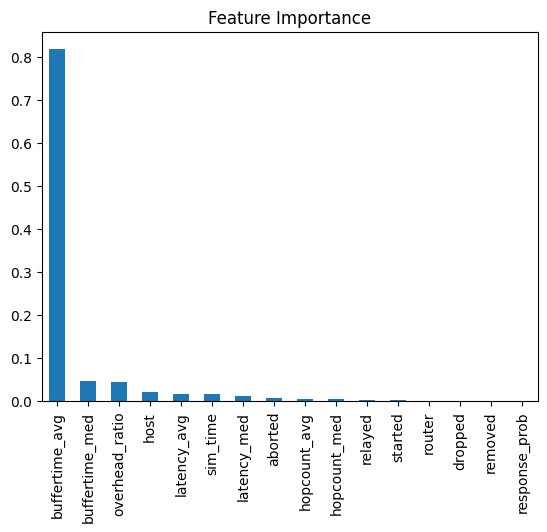

Epidemic Router


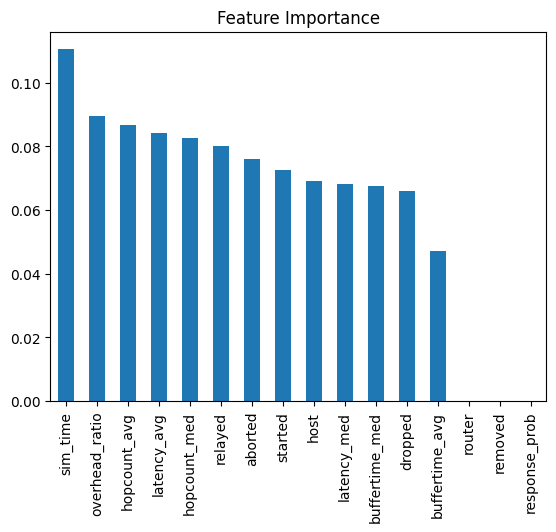

Prophet Router


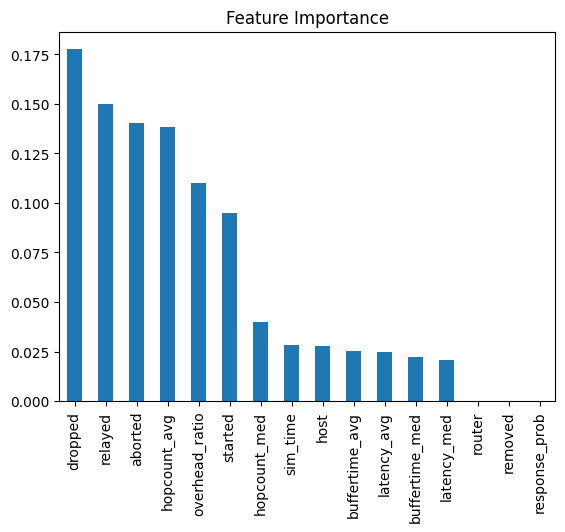

Spray And Wait Router


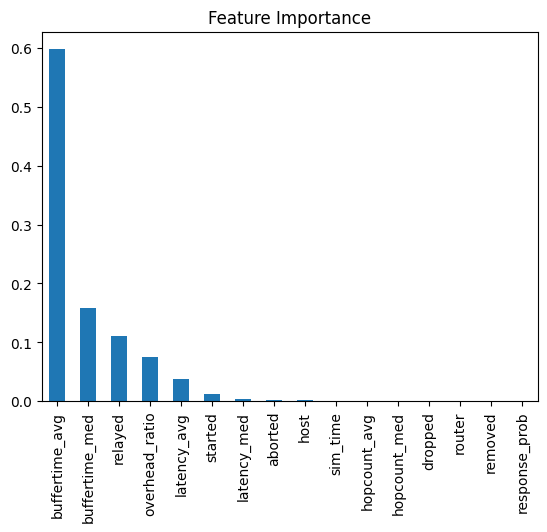

In [24]:
#dataset return [X_train, X_test, y_train, y_test, X, y]
# ml return [y_pred_lr,y_pred_rf,y_pred_xgb,y_pred_svr,lr,rf,xgb,svr]
def fi(dataset,ml,name):
    feature_importances = pd.Series(ml[5].feature_importances_, index=dataset[4].columns)
    feature_importances.sort_values(ascending=False).plot(kind='bar', title="Feature Importance")
    plt.savefig(f'plot-Feature Importance{name}.jpg', format="jpg", dpi=300, bbox_inches="tight")
    plt.savefig(f'plot-Feature Importance{name}.eps', format="eps", dpi=300, bbox_inches="tight")

    plt.show()
fi0 = fi(datasetA,mlA,'All')
print("Epidemic Router")
fi0 = fi(dataset0,ml0,'Epidemic')
print("Prophet Router")
fi1 = fi(dataset1,ml1,'Prophet')
print("Spray And Wait Router")
fi2 = fi(dataset2,ml2,'Spray')

C:\Users\User\AppData\Local\Temp\ipykernel_6996\716890818.py:69: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
C:\Users\User\AppData\Local\Temp\ipykernel_6996\716890818.py:83: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch 1/100, Loss: 0.476585, LR: 0.000200
Epoch 2/100, Loss: 0.131653, LR: 0.000200
Epoch 3/100, Loss: 0.091278, LR: 0.000200
Epoch 4/100, Loss: 0.074353, LR: 0.000200
Epoch 5/100, Loss: 0.073016, LR: 0.000200
Epoch 6/100, Loss: 0.069893, LR: 0.000200
Epoch 7/100, Loss: 0.066892, LR: 0.000200
Epoch 8/100, Loss: 0.057356, LR: 0.000200
Epoch 9/100, Loss: 0.056835, LR: 0.000200
Epoch 10/100, Loss: 0.052841, LR: 0.000200
Epoch 11/100, Loss: 0.048900, LR: 0.000200
Epoch 12/100, Loss: 0.048290, LR: 0.000200
Epoch 13/100, Loss: 0.041330, LR: 0.000200
Epoch 14/100, Loss: 0.045229, LR: 0.000200
Epoch 15/100, Loss: 0.038316, LR: 0.000200
Epoch 16/100, Loss: 0.037011, LR: 0.000201
Epoch 17/100, Loss: 0.038542, LR: 0.000201
Epoch 18/100, Loss: 0.037652, LR: 0.000201
Epoch 19/100, Loss: 0.037450, LR: 0.000201
Epoch 20/100, Loss: 0.033595, LR: 0.000201
Epoch 21/100, Loss: 0.040155, LR: 0.000201
Epoch 22/100, Loss: 0.037043, LR: 0.000201
Epoch 23/100, Loss: 0.032960, LR: 0.000201
Epoch 24/100, Loss: 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Epoch 100/100, Loss: 0.024069, LR: 0.000220
Performance Metrics:
MSE: 0.0089, MAE: 0.0644, RMSE: 0.0945, R² Score: 0.9909


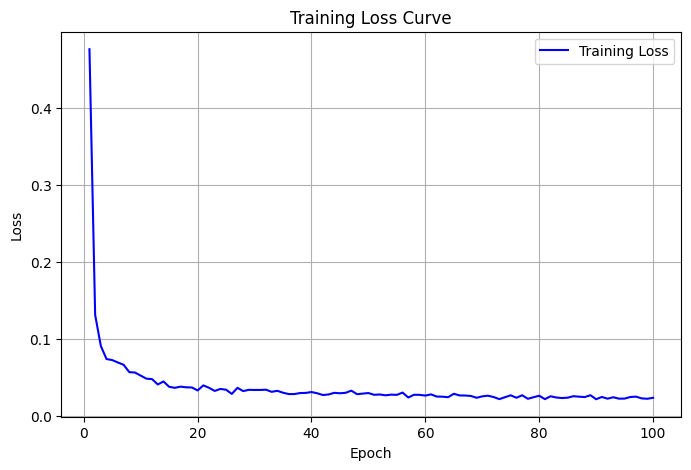

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


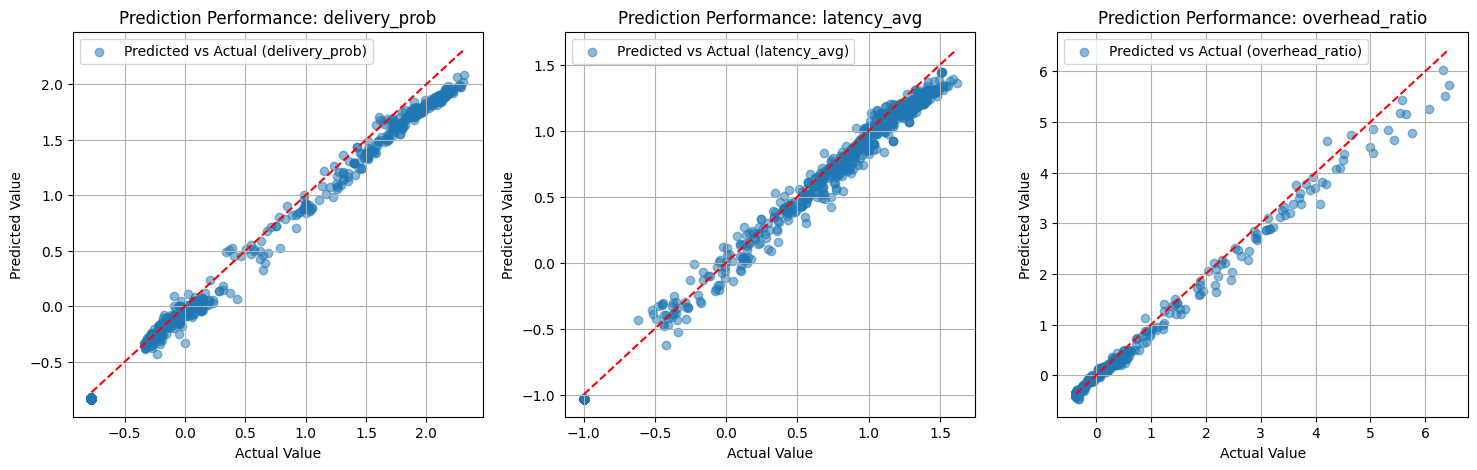

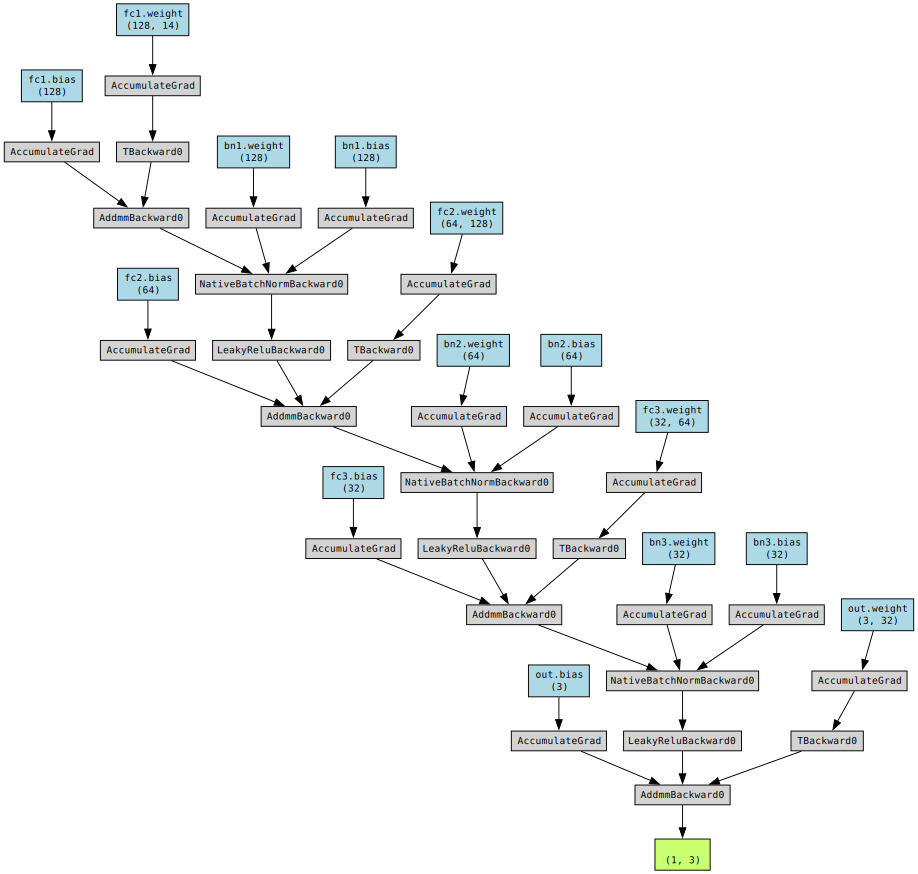

In [25]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -------------------- Data Loading and Preprocessing --------------------
target_cols = ['delivery_prob', 'latency_avg', 'overhead_ratio']
features_cols = list(set(df.columns) - set(target_cols + ['router']))

le = LabelEncoder()
df['router_type_enc'] = le.fit_transform(df['router'])
features_cols.append('router_type_enc')

X = df[features_cols].values.astype(np.float32)
y = df[target_cols].values.astype(np.float32)

scaler_X, scaler_y = StandardScaler(), StandardScaler()
X_scaled, y_scaled = scaler_X.fit_transform(X), scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# -------------------- PyTorch Dataset --------------------
class IoVDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(IoVDataset(X_train, y_train), batch_size=64, shuffle=True)
test_loader = DataLoader(IoVDataset(X_test, y_test), batch_size=64)

# -------------------- Optimized IoVNet Model --------------------
class IoVNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(IoVNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.out = nn.Linear(32, output_dim)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = torch.nn.functional.leaky_relu(self.bn1(self.fc1(x)), negative_slope=0.01)
        x = self.dropout(x)
        x = torch.nn.functional.leaky_relu(self.bn2(self.fc2(x)), negative_slope=0.01)
        x = self.dropout(x)
        x = torch.nn.functional.leaky_relu(self.bn3(self.fc3(x)), negative_slope=0.01)
        return self.out(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = IoVNet(X_train.shape[1], len(target_cols)).to(device)

criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=1e-8)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.005, steps_per_epoch=len(train_loader), epochs=100)

scaler = torch.cuda.amp.GradScaler()

# -------------------- Training Loop --------------------
num_epochs = 100
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        optimizer.zero_grad()
        with torch.cuda.amp.autocast():
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)

        scaler.scale(loss).backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient Clipping
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item() * batch_X.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)
    scheduler.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.6f}, LR: {scheduler.get_last_lr()[0]:.6f}")

# -------------------- Model Evaluation --------------------
model.eval()
y_true_list, y_pred_list = [], []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        y_pred = model(batch_X).cpu().numpy()
        y_true_list.append(batch_y.cpu().numpy())
        y_pred_list.append(y_pred)

y_true, y_pred = np.vstack(y_true_list), np.vstack(y_pred_list)
mse, mae, r2, rmse = mean_squared_error(y_true, y_pred), mean_absolute_error(y_true, y_pred), r2_score(y_true, y_pred), np.sqrt(mean_squared_error(y_true, y_pred))

print(f"Performance Metrics:\nMSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

# -------------------- PLOTS --------------------

#Loss Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, num_epochs+1), train_losses, label="Training Loss", color='blue')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid()
plt.savefig(f'plot-Training Loss Curve.jpg', format="jpg", dpi=300, bbox_inches="tight")
plt.savefig(f'plot-Training Loss Curve.eps', format="eps", dpi=300, bbox_inches="tight")
plt.show()

#True vs. Predicted Values for each Target Variable
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, target in enumerate(target_cols):
    axes[i].scatter(y_true[:, i], y_pred[:, i], alpha=0.5, label=f"Predicted vs Actual ({target})")
    axes[i].plot([min(y_true[:, i]), max(y_true[:, i])], [min(y_true[:, i]), max(y_true[:, i])], color='red', linestyle='--')
    axes[i].set_xlabel("Actual Value")
    axes[i].set_ylabel("Predicted Value")
    axes[i].set_title(f"Prediction Performance: {target}")
    axes[i].legend()
    axes[i].grid()
plt.savefig(f'plot-Prediction Performance.jpg', format="jpg", dpi=300, bbox_inches="tight")
plt.savefig(f'plot-Prediction Performance.eps', format="eps", dpi=300, bbox_inches="tight")
plt.show()

#Model Architecture Visualization
from torchviz import make_dot
dummy_input = torch.randn(1, X_train.shape[1]).to(device)
dot = make_dot(model(dummy_input), params=dict(model.named_parameters()))
dot.render("iov_model_architecture", format="jpg")  # Saves as jpg
dot.render("iov_model_architecture", format="eps")  # Saves as eps
dot  # Displays the network graph